In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

In [2]:
data = pd.read_csv('../main/log/deep_mutation_impact_n.csv', names = ['dataset', 'algorithm', 'seed', 'operator', 'size',
                                                                   'nodes', 'depth', 'operation_index',
                                                                    'train_similarity', 'test_similarity',
                                                                   'train_distance', 'test_distance', 
                                                                   'train_variation', 'test_variation'])

In [3]:
data.drop_duplicates(subset = ['dataset', 'algorithm', 'seed', 'operator'], keep = 'last')

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_similarity,test_similarity,train_distance,test_distance,train_variation,test_variation
998,yatch,SLIM+2SIG,0,inflate,1000,20288,1007,-1,0.999998,0.999997,8.155665e-01,3.861705e-01,1.000000,1.000000
1996,yatch,SLIM+2SIG,0,deflate,999,20265,1006,998,0.999490,0.999581,8.603785e+00,3.455934e+00,1.000000,1.000000
2995,airfoil,SLIM+2SIG,0,inflate,1000,22858,1007,-1,1.000000,1.000000,3.808144e-05,2.278102e-05,0.006650,0.013333
3993,airfoil,SLIM+2SIG,0,deflate,999,22835,1006,998,0.999970,0.999965,3.280125e+01,1.638339e+01,1.000000,1.000000
4992,concrete_slump,SLIM+2SIG,0,inflate,1000,18580,1007,-1,0.999848,0.999821,1.666802e+00,7.947147e-01,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189705,ppb,SLIM*1NORM,99,deflate,999,15005,1005,998,NaN,NaN,NaN,NaN,0.533333,0.423077
4190704,bioav,SLIM*1NORM,99,inflate,1000,15062,1006,-1,0.000000,0.000000,1.694108e-05,8.426149e-06,0.000000,0.000000
4191702,bioav,SLIM*1NORM,99,deflate,999,15047,1005,998,0.000000,0.000000,1.694108e-05,8.426149e-06,0.000000,0.000000
4192701,ld50,SLIM*1NORM,99,inflate,1000,15020,1006,-1,0.999996,0.999999,7.050814e+10,6.402818e+10,1.000000,1.000000


In [4]:
data.algorithm.unique()

array(['SLIM+2SIG', 'SLIM*1SIG', 'SLIM*1NORM'], dtype=object)

In [5]:
data.head()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_similarity,test_similarity,train_distance,test_distance,train_variation,test_variation
0,yatch,SLIM+2SIG,0,inflate,2,48,9,-1,0.991601,0.993375,2.493179,1.035108,1.0,1.0
1,yatch,SLIM+2SIG,0,inflate,3,69,10,-1,0.970506,0.964283,5.240146,2.500263,1.0,1.0
2,yatch,SLIM+2SIG,0,inflate,4,94,11,-1,0.992006,0.992962,4.062109,2.206226,1.0,1.0
3,yatch,SLIM+2SIG,0,inflate,5,109,12,-1,0.999999,1.000000,0.029782,0.013818,1.0,1.0
4,yatch,SLIM+2SIG,0,inflate,6,128,13,-1,0.996691,0.997368,2.029124,1.049970,1.0,1.0


In [6]:
data.tail()

,dataset,algorithm,seed,operator,size,nodes,depth,operation_index,train_similarity,test_similarity,train_distance,test_distance,train_variation,test_variation
4193695,ld50,SLIM*1NORM,99,deflate,999,15005,1005,994,1.000000,1.000000,4.492824e+11,3.565920e+11,0.87766,0.847826
4193696,ld50,SLIM*1NORM,99,deflate,999,15005,1005,995,0.999996,0.999999,3.354981e+11,2.712490e+11,1.00000,1.000000
4193697,ld50,SLIM*1NORM,99,deflate,999,15005,1005,996,0.999998,0.999999,8.355871e+11,6.677103e+11,1.00000,1.000000
4193698,ld50,SLIM*1NORM,99,deflate,999,15005,1005,997,1.000000,1.000000,4.269073e+11,3.408376e+11,1.00000,1.000000
4193699,ld50,SLIM*1NORM,99,deflate,999,15005,1005,998,0.999999,1.000000,1.340320e+12,1.066579e+12,1.00000,1.000000


yatch


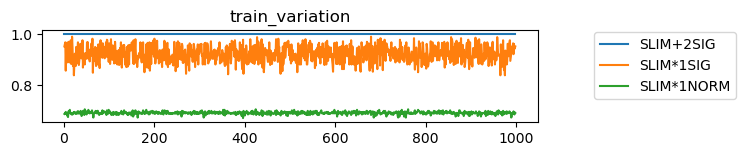

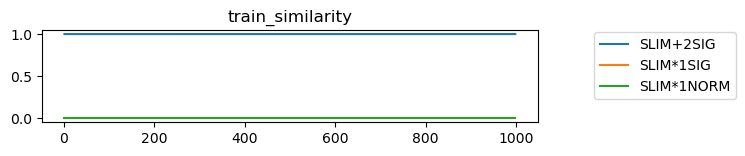

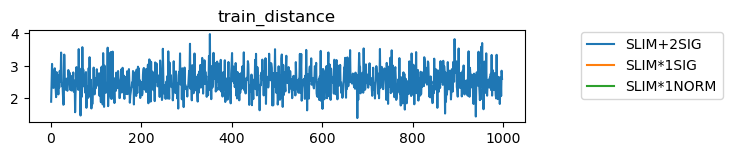

airfoil


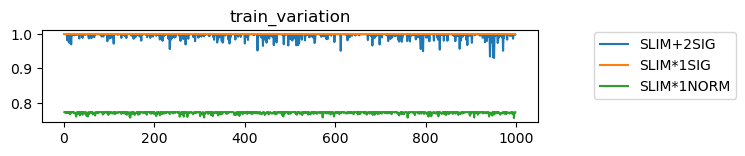

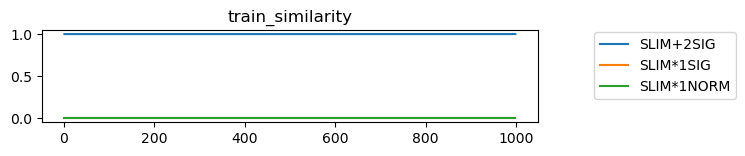

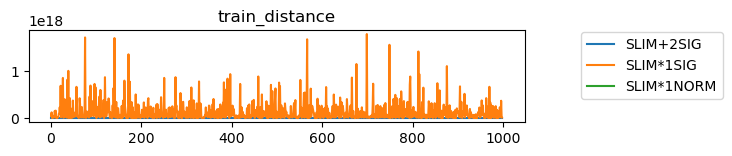

concrete_slump


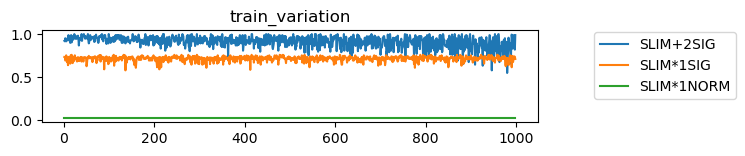

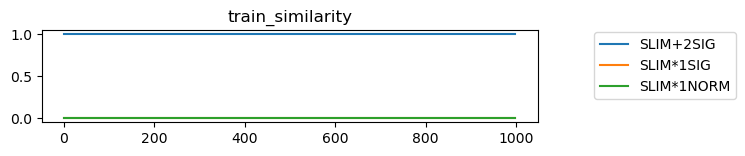

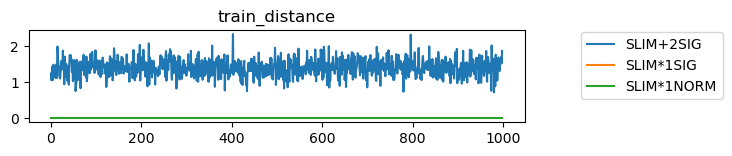

concrete_strength


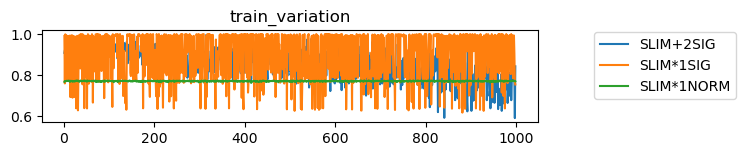

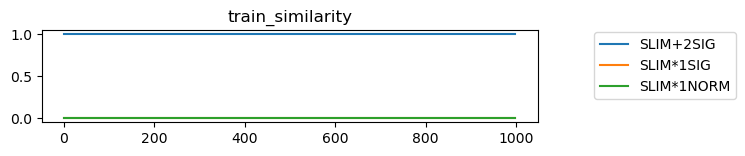

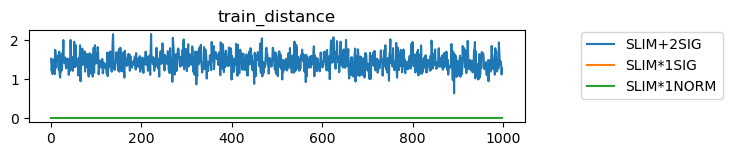

ppb


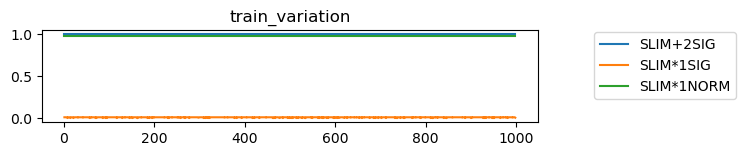

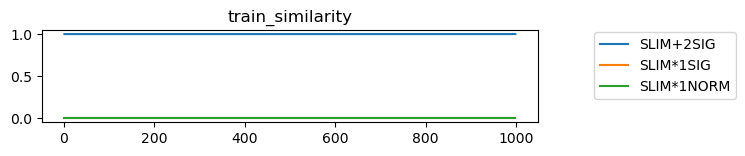

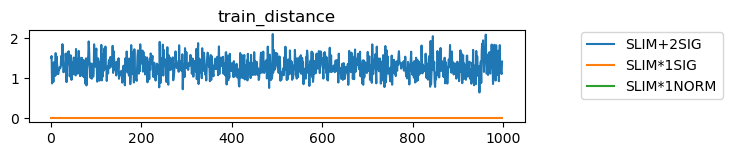

bioav


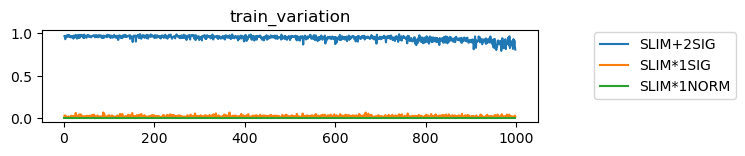

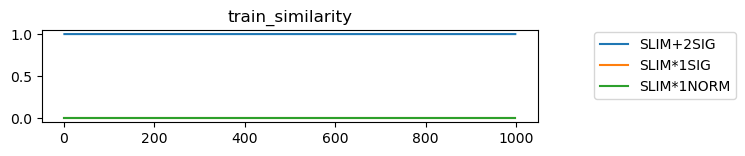

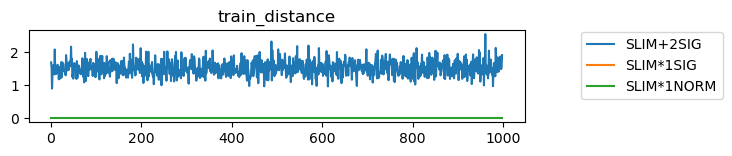

ld50


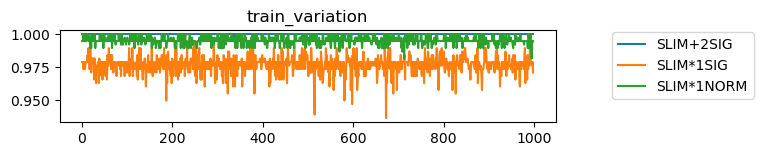

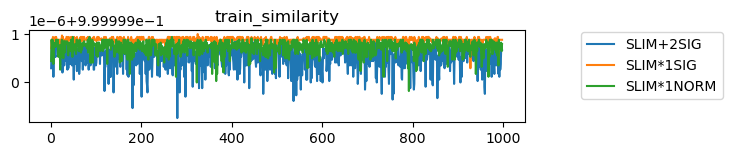

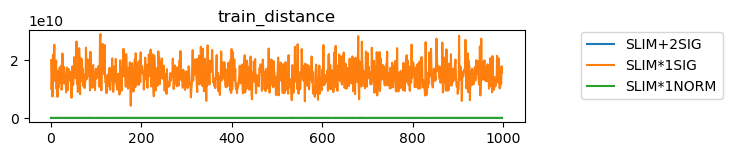

In [11]:
for ds in data.dataset.unique():
    print(ds)
    gs = gridspec.GridSpec(3, 1)
    gs.update( wspace=0.6, hspace =  0.5)
    for i, metric in enumerate(['train_variation', 'train_similarity', 'train_distance']):
        ax = pl.subplot(gs[i, 0]) 
        for algo in data.algorithm.unique():
            grouped = data.query("dataset == @ds and algorithm == @algo and operator == 'deflate' ")[[
                'operation_index', 'train_variation', 'train_similarity', 'train_distance']].groupby(
                ['operation_index']).median()
            grouped.reset_index(inplace = True)
            pl.plot(grouped.operation_index.values, grouped[metric], label = algo)
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        plt.title(metric)
        plt.show()